#### Question 2

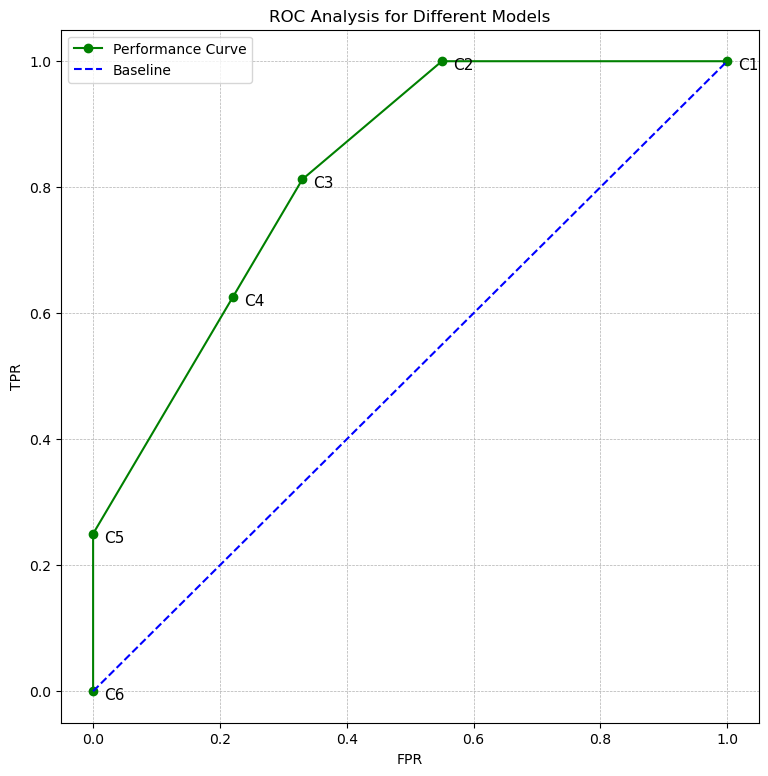

In [1]:
import matplotlib.pyplot as plt


models = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
false_positive_rate = [1, 0.55, 0.33, 0.22, 0, 0]
true_positive_rate = [1, 1, 0.8125, 0.625, 0.25, 0]


plt.figure(figsize=(9, 9))


plt.plot(false_positive_rate, true_positive_rate, marker='o', linestyle='-', color='green', label='Performance Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Baseline')


for idx, label in enumerate(models):
    plt.annotate(label, (false_positive_rate[idx], true_positive_rate[idx]), textcoords="offset points", xytext=(8, -6), ha='left', fontsize=11)


plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Analysis for Different Models")
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)


plt.show()

#### Question 3

In [9]:
import numpy as np

data = [
    ((2, 2, 3), 1),
    ((3, 3, 2), 1),
    ((1, 2, 3), 1),
    ((1, 4, 1), 1),
    ((4, 4, 4), 1),
    ((2, 2, 2), 1),
    ((3, 3, 1), -1),
    ((1, 1, 1), -1),
    ((3, 2, 2), -1),
    ((0, 4, 2), -1),
    ((4, 0, 0), -1),
    ((0, 0, 3), -1),
]

w = np.array([3, 2, 4])
b = -18

norm_w = np.sqrt(29)               # 3 ^ 2 + 2 ^ 2 + 4 ^ 2 = 29

def calculate_f_of_x(x):
    return (np.dot(w, x) + b)

def calculate_margin(x):
    return abs(calculate_f_of_x(x) / norm_w)

def calculate_01_loss(y, x):
    return 0 if y * calculate_f_of_x(x) >= 0 else 1

def hinge_loss(y, x):
    return max(0, 1 - y * calculate_f_of_x(x))

def squared_loss(y, x):
    return (y - calculate_f_of_x(x)) ** 2

# Compute values for each data point
for (x, y) in data:
    margin = calculate_margin(np.array(x))

    h_loss = hinge_loss(y, np.array(x))
    s_loss = squared_loss(y, np.array(x))
    print(f"Point: {x}, Class: {y}, Margin: {margin:.4f}, 0-1 loss: {calculate_01_loss(y, x)}, Hinge Loss: {h_loss:.4f}, Squared Loss: {s_loss:.4f}")

Point: (2, 2, 3), Class: 1, Margin: 0.7428, 0-1 loss: 0, Hinge Loss: 0.0000, Squared Loss: 9.0000
Point: (3, 3, 2), Class: 1, Margin: 0.9285, 0-1 loss: 0, Hinge Loss: 0.0000, Squared Loss: 16.0000
Point: (1, 2, 3), Class: 1, Margin: 0.1857, 0-1 loss: 0, Hinge Loss: 0.0000, Squared Loss: 0.0000
Point: (1, 4, 1), Class: 1, Margin: 0.5571, 0-1 loss: 1, Hinge Loss: 4.0000, Squared Loss: 16.0000
Point: (4, 4, 4), Class: 1, Margin: 3.3425, 0-1 loss: 0, Hinge Loss: 0.0000, Squared Loss: 289.0000
Point: (2, 2, 2), Class: 1, Margin: 0.0000, 0-1 loss: 0, Hinge Loss: 1.0000, Squared Loss: 1.0000
Point: (3, 3, 1), Class: -1, Margin: 0.1857, 0-1 loss: 1, Hinge Loss: 2.0000, Squared Loss: 4.0000
Point: (1, 1, 1), Class: -1, Margin: 1.6713, 0-1 loss: 0, Hinge Loss: 0.0000, Squared Loss: 64.0000
Point: (3, 2, 2), Class: -1, Margin: 0.5571, 0-1 loss: 1, Hinge Loss: 4.0000, Squared Loss: 16.0000
Point: (0, 4, 2), Class: -1, Margin: 0.3714, 0-1 loss: 0, Hinge Loss: 0.0000, Squared Loss: 1.0000
Point: (4,

#### Question 5

In [2]:
import numpy as np

# Load dataset
X = np.load('HW2_data/data_X_Q5Q6.npy')
y = np.load('HW2_data/data_y_Q5Q6.npy')

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]

# Hyperparameters
alpha = 0.01  # Learning rate
epochs = 1000  # Number of iterations
lambda_reg = 1e-6  # Regularization parameter

def gradient_descent(X, y, alpha, epochs, lambda_reg=0):
    m, n = X.shape
    w = np.zeros((n, 1))
    for _ in range(epochs):
        gradient = (X.T @ (X @ w - y) + lambda_reg * w) / m
        w -= alpha * gradient
    return w

def stochastic_gradient_descent(X, y, alpha, epochs, lambda_reg=0):
    m, n = X.shape
    w = np.zeros((n, 1))
    for _ in range(epochs):
        for i in range(m):
            xi = X[i, :].reshape(1, -1)
            yi = y[i]
            gradient = xi.T @ (xi @ w - yi) + lambda_reg * w
            w -= alpha * gradient
    return w

def closed_form_solution(X, y, lambda_reg=0):
    n = X.shape[1]
    I = np.eye(n)
    I[0, 0] = 0  # Do not regularize bias term
    return np.linalg.inv(X.T @ X + lambda_reg * I) @ X.T @ y

# Compute solutions
w_gd_lsqr = gradient_descent(X, y, alpha, epochs)
w_sgd_lsqr = stochastic_gradient_descent(X, y, alpha, epochs)
w_closed_lsqr = closed_form_solution(X, y)

w_gd_ridge = gradient_descent(X, y, alpha, epochs, lambda_reg)
w_sgd_ridge = stochastic_gradient_descent(X, y, alpha, epochs, lambda_reg)
w_closed_ridge = closed_form_solution(X, y, lambda_reg)

# Compute L2-norm distances
def compute_l2_distance(w1, w2):
    return np.linalg.norm(w1 - w2)

distances = {
    "LSQR_GD_vs_SGD": compute_l2_distance(w_gd_lsqr, w_sgd_lsqr),
    "LSQR_GD_vs_Closed": compute_l2_distance(w_gd_lsqr, w_closed_lsqr),
    "LSQR_SGD_vs_Closed": compute_l2_distance(w_sgd_lsqr, w_closed_lsqr),
    "Ridge_GD_vs_SGD": compute_l2_distance(w_gd_ridge, w_sgd_ridge),
    "Ridge_GD_vs_Closed": compute_l2_distance(w_gd_ridge, w_closed_ridge),
    "Ridge_SGD_vs_Closed": compute_l2_distance(w_sgd_ridge, w_closed_ridge),
}

# Print distances
for key, value in distances.items():
    print(f"{key}: {value:.6f}")

LSQR_GD_vs_SGD: 6.874165
LSQR_GD_vs_Closed: 6.832557
LSQR_SGD_vs_Closed: 0.311339
Ridge_GD_vs_SGD: 6.866104
Ridge_GD_vs_Closed: 6.832556
Ridge_SGD_vs_Closed: 0.310671


#### Question 6

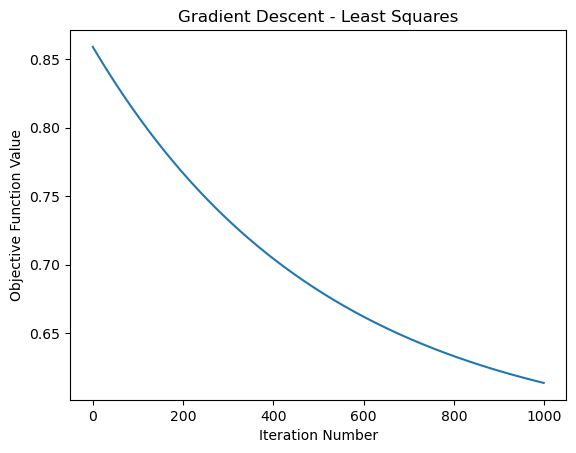

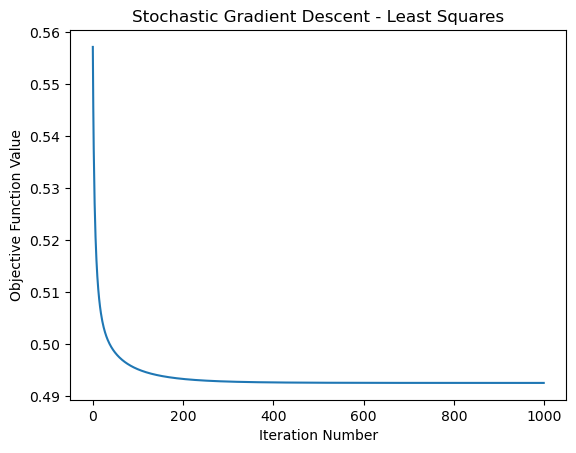

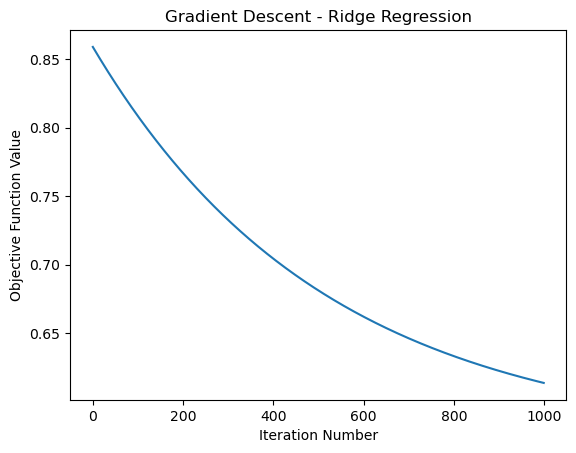

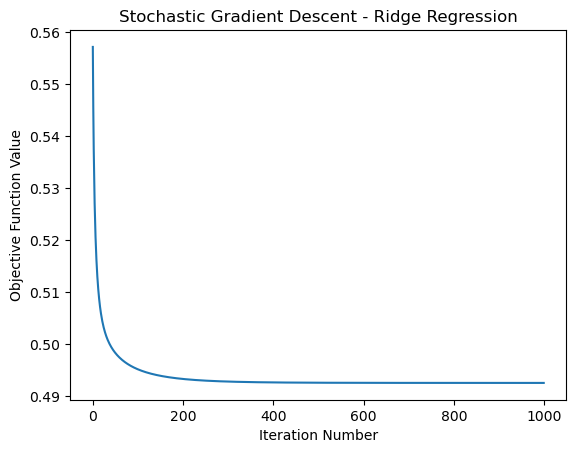

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
X = np.load('HW2_data/data_X_Q5Q6.npy')
y = np.load('HW2_data/data_y_Q5Q6.npy')

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]

# Hyperparameters
alpha = 1e-3  # Learning rate
epochs = 1000  # Number of iterations
lambda_reg = 1e-6  # Regularization parameter

def compute_objective(X, y, w, lambda_reg=0):
    m = X.shape[0]
    loss = np.linalg.norm(X @ w - y) ** 2 / (2 * m) + (lambda_reg / 2) * np.linalg.norm(w) ** 2
    return loss

def gradient_descent(X, y, alpha, epochs, lambda_reg=0):
    m, n = X.shape
    w = np.zeros((n, 1))
    losses = []
    for _ in range(epochs):
        gradient = (X.T @ (X @ w - y) + lambda_reg * w) / m
        w -= alpha * gradient
        losses.append(compute_objective(X, y, w, lambda_reg))
    return w, losses

def stochastic_gradient_descent(X, y, alpha, epochs, lambda_reg=0):
    m, n = X.shape
    w = np.zeros((n, 1))
    losses = []
    for _ in range(epochs):
        for i in range(m):
            xi = X[i, :].reshape(1, -1)
            yi = y[i]
            gradient = xi.T @ (xi @ w - yi) + lambda_reg * w
            w -= alpha * gradient
        losses.append(compute_objective(X, y, w, lambda_reg))
    return w, losses

def closed_form_solution(X, y, lambda_reg=0):
    n = X.shape[1]
    I = np.eye(n)
    I[0, 0] = 0  # Do not regularize bias term
    return np.linalg.inv(X.T @ X + lambda_reg * I) @ X.T @ y

# Compute solutions and losses
w_gd_lsqr, losses_gd_lsqr = gradient_descent(X, y, alpha, epochs)
w_sgd_lsqr, losses_sgd_lsqr = stochastic_gradient_descent(X, y, alpha, epochs)
w_gd_ridge, losses_gd_ridge = gradient_descent(X, y, alpha, epochs, lambda_reg)
w_sgd_ridge, losses_sgd_ridge = stochastic_gradient_descent(X, y, alpha, epochs, lambda_reg)

# Plot learning curves
def plot_learning_curve(losses, title):
    plt.plot(range(len(losses)), losses)
    plt.xlabel("Iteration Number")
    plt.ylabel("Objective Function Value")
    plt.title(title)
    plt.show()

plot_learning_curve(losses_gd_lsqr, "Gradient Descent - Least Squares")
plot_learning_curve(losses_sgd_lsqr, "Stochastic Gradient Descent - Least Squares")
plot_learning_curve(losses_gd_ridge, "Gradient Descent - Ridge Regression")
plot_learning_curve(losses_sgd_ridge, "Stochastic Gradient Descent - Ridge Regression")

#### Question 7

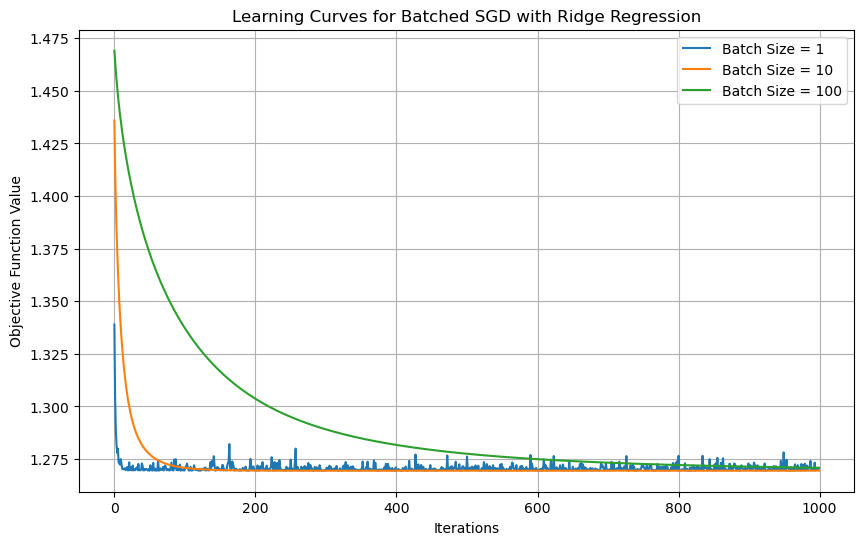

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
X = np.load('HW2_data/data_X_Q7.npy')
y = np.load('HW2_data/data_y_Q7.npy')

# Ridge regression parameters
alpha = 0.01  # Regularization strength
learning_rate = 0.001
num_iterations = 1000

# Initialize weights
w = np.zeros((X.shape[1], 1))

# Ridge regression objective function
def ridge_objective(X, y, w, alpha):
    residuals = y - X @ w
    mse = np.mean(residuals ** 2)
    regularization = alpha * np.sum(w ** 2)
    return mse + regularization

# Batched SGD for ridge regression
def batched_sgd(X, y, batch_size, learning_rate, num_iterations, alpha):
    n_samples, n_features = X.shape
    w = np.zeros((n_features, 1))
    objective_values = []

    for iteration in range(num_iterations):
        # Shuffle data
        indices = np.random.permutation(n_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Process in batches
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # Compute gradient
            residuals = y_batch - X_batch.dot(w)
            gradient = -2 * X_batch.T @ (residuals) / batch_size + 2 * alpha * w

            # Update weights
            w -= learning_rate * gradient

        # Compute objective value
        objective_values.append(ridge_objective(X, y, w, alpha))

    return w, objective_values

# Run batched SGD for different batch sizes
batch_sizes = [1, 10, 100]
results = {}

for batch_size in batch_sizes:
    w, objective_values = batched_sgd(X, y, batch_size, learning_rate, num_iterations, alpha)
    results[batch_size] = objective_values

# Plot learning curves
plt.figure(figsize=(10, 6))
for batch_size, objective_values in results.items():
    plt.plot(objective_values, label=f'Batch Size = {batch_size}')

plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('Learning Curves for Batched SGD with Ridge Regression')
plt.legend()
plt.grid()
plt.show()

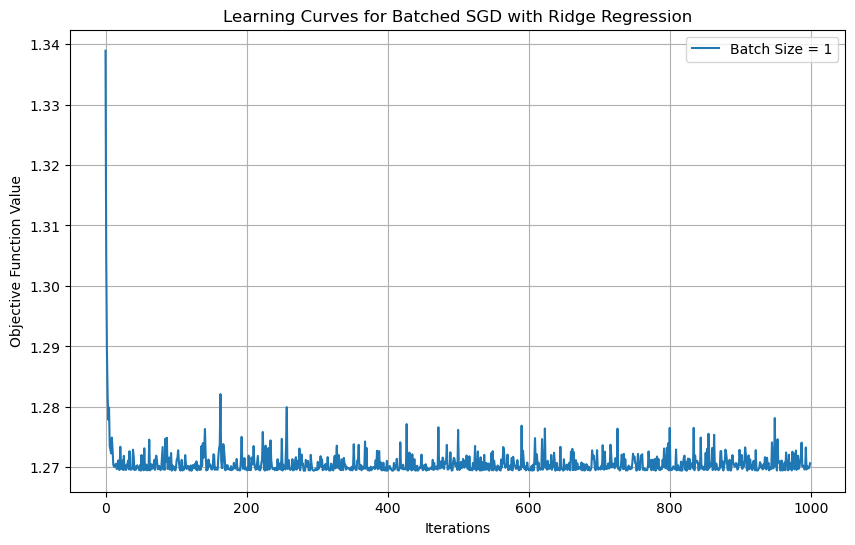

In [6]:
# Plot learning curves
plt.figure(figsize=(10, 6))

plt.plot(results[1], label=f'Batch Size = {1}')

plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('Learning Curves for Batched SGD with Ridge Regression')
plt.legend()
plt.grid()
plt.show()

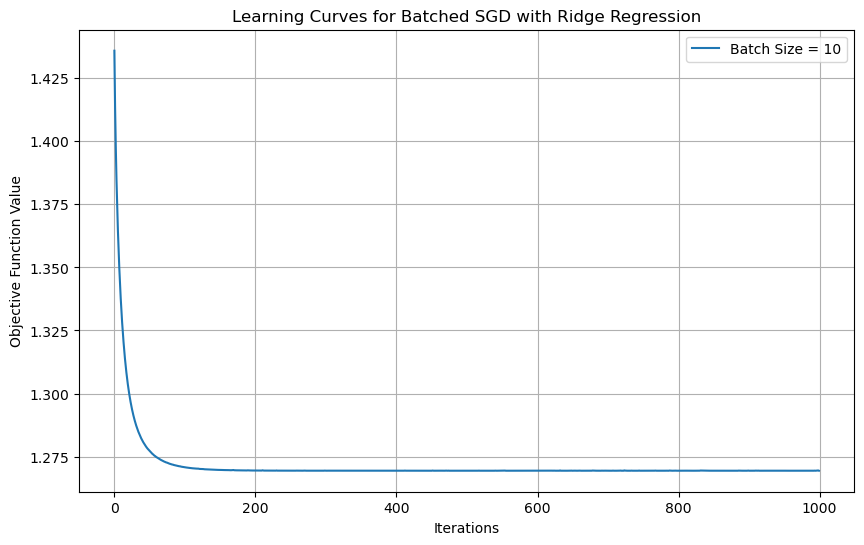

In [7]:
# Plot learning curves
plt.figure(figsize=(10, 6))

plt.plot(results[10], label=f'Batch Size = {10}')

plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('Learning Curves for Batched SGD with Ridge Regression')
plt.legend()
plt.grid()
plt.show()

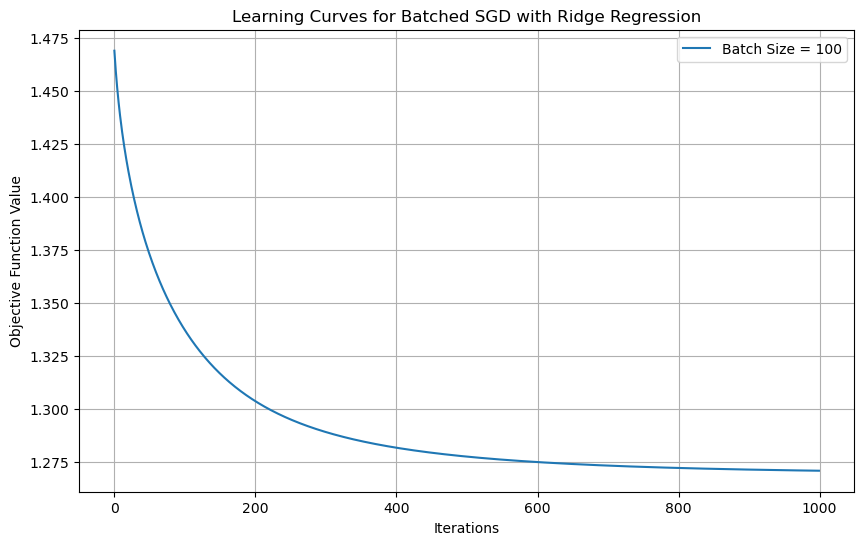

In [8]:
# Plot learning curves
plt.figure(figsize=(10, 6))

plt.plot(results[100], label=f'Batch Size = {100}')

plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('Learning Curves for Batched SGD with Ridge Regression')
plt.legend()
plt.grid()
plt.show()